## Uniform Cost Search 

In [2]:
import heapq

def ucs_search(grid, start):
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    goal = min(corners, key=lambda x: abs(start[0] - x[0]) + abs(start[1] - x[1]))
    open_set = []
    heapq.heappush(open_set, (0, start))  # Only g_score
    came_from = {}
    g_score = {start: 0}

    while open_set:
        current_g, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in neighbors(grid, current):
            tentative_g_score = g_score[current] + 1  # Assuming all movements have a cost of 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                heapq.heappush(open_set, (g_score[neighbor], neighbor))


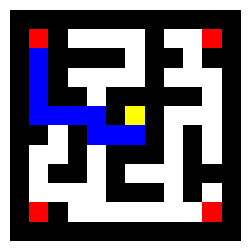

In [7]:
import heapq
from maze_visualizer import *

def ucs_search(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # Only g_score, start node
    came_from = {}
    g_score = {start: 0}

    while open_set:
        current_g, current = heapq.heappop(open_set)
        
        if current == goal:
            return reconstruct_path(came_from, current)
        
        for neighbor in neighbors(grid, current):
            tentative_g_score = g_score[current] + 1  # Assuming all movements have a cost of 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                heapq.heappush(open_set, (g_score[neighbor], neighbor))
                
    return None

def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.insert(0, current)
    return total_path

def neighbors(grid, cell):
    neighbors = []
    for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
        x, y = cell[0] + dx, cell[1] + dy
        if 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != 1:
            neighbors.append((x, y))
    return neighbors

# Define the start position and the goal
start = (5, 6)
goal = (1, 1)

# Use the sample_maze from the given visualization library
path = ucs_search(sample_maze, start, goal)

# Now, use the show_solution function to visualize the maze and the path
show_solution(sample_maze, start, [path])


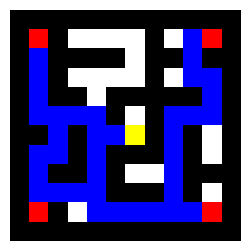

In [11]:
from maze_visualizer import *
import heapq

def ucs_search_all_corners(grid, start):
    # Define the four corners of the maze
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    visited_corners = set()
    current_position = start
    complete_path = []
    
    while len(visited_corners) < len(corners):
        # Find the closest unvisited corner
        closest_corner = None
        shortest_path_to_corner = None
        for corner in corners:
            if corner not in visited_corners:
                path_to_corner = ucs_search_to_corner(grid, current_position, corner)
                if shortest_path_to_corner is None or len(path_to_corner) < len(shortest_path_to_corner):
                    closest_corner = corner
                    shortest_path_to_corner = path_to_corner
                    
        # Update the path and visited corners
        if closest_corner:
            visited_corners.add(closest_corner)
            complete_path += shortest_path_to_corner[1:]  # Exclude the start point for subsequent paths
            current_position = closest_corner

    return complete_path

def ucs_search_to_corner(grid, start, goal):
    open_set = []
    heapq.heappush(open_set, (0, start))  # Only g_score, start node
    came_from = {}
    g_score = {start: 0}

    while open_set:
        current_g, current = heapq.heappop(open_set)
        
        if current == goal:
            return reconstruct_path(came_from, current)
        
        for neighbor in neighbors(grid, current):
            tentative_g_score = g_score[current] + 1  # Assuming all movements have a cost of 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                heapq.heappush(open_set, (g_score[neighbor], neighbor))
                
    return None

# Remember to define or import 'reconstruct_path' and 'neighbors' functions as they were previously defined.

# Now, use the modified UCS function to find a path through all corners
start = (5, 6)  # Starting point
all_corners_path = ucs_search_all_corners(sample_maze, start)

# Visualize the complete path through all corners
show_solution(sample_maze, start, [all_corners_path])


Segment 1: Start to Corner 1


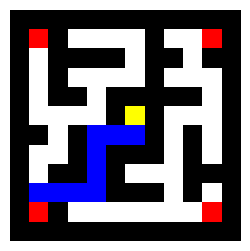

Segment 2: Start to Corner 2


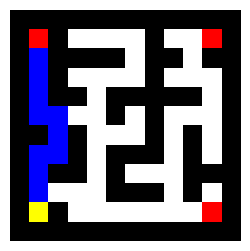

Segment 3: Start to Corner 3


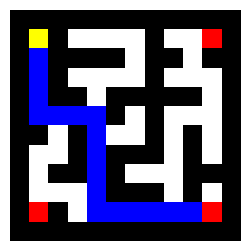

Segment 4: Start to Corner 4


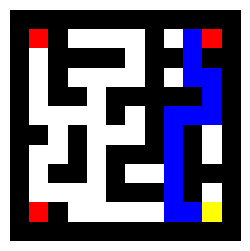

In [12]:
def ucs_search_all_corners(grid, start):
    # Define the four corners of the maze
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    visited_corners = set()
    current_position = start
    paths_to_corners = []
    
    while len(visited_corners) < len(corners):
        # Initialize variables for finding the closest corner
        closest_corner = None
        shortest_path_to_corner = None
        
        for corner in corners:
            if corner not in visited_corners:
                path_to_corner = ucs_search_to_corner(grid, current_position, corner)
                # Check if this is the shortest path so far
                if shortest_path_to_corner is None or len(path_to_corner) < len(shortest_path_to_corner):
                    closest_corner = corner
                    shortest_path_to_corner = path_to_corner
        
        if closest_corner:
            visited_corners.add(closest_corner)
            # Append the path to the specific corner
            paths_to_corners.append(shortest_path_to_corner)
            current_position = closest_corner

    return paths_to_corners

# Use the modified function to find paths to all corners
start = (5, 6)  # Define the starting position
all_corners_paths = ucs_search_all_corners(sample_maze, start)

# Visualize and print each segment individually
for i, path_segment in enumerate(all_corners_paths, start=1):
    print(f"Segment {i}: Start to Corner {i}")
    show_solution(sample_maze, start, [path_segment])
    start = path_segment[-1]  # Update start to the end of the last segment for correct visualization


In [13]:
all_corners_path

[(6, 6),
 (6, 5),
 (6, 4),
 (7, 4),
 (8, 4),
 (9, 4),
 (9, 3),
 (9, 2),
 (9, 1),
 (10, 1),
 (9, 1),
 (8, 1),
 (7, 1),
 (7, 2),
 (6, 2),
 (5, 2),
 (5, 1),
 (4, 1),
 (3, 1),
 (2, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 4),
 (9, 4),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9),
 (10, 10),
 (10, 9),
 (10, 8),
 (9, 8),
 (8, 8),
 (7, 8),
 (6, 8),
 (5, 8),
 (5, 9),
 (5, 10),
 (4, 10),
 (3, 10),
 (3, 9),
 (2, 9),
 (1, 9),
 (1, 10)]

## Greedy Search

In [8]:
import heapq

def greedy_best_first_search(grid, start):
    corners = [(1, 1), (1, len(grid[0])-2), (len(grid)-2, 1), (len(grid)-2, len(grid[0])-2)]
    goal = min(corners, key=lambda x: abs(start[0] - x[0]) + abs(start[1] - x[1]))
    open_set = []
    heapq.heappush(open_set, (heuristic_cost_estimate(start, goal), start))  # Only h_score
    came_from = {}

    while open_set:
        current_h, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)

        for neighbor in neighbors(grid, current):
            if neighbor not in came_from:  # Check if the neighbor is not already explored
                came_from[neighbor] = current
                heapq.heappush(open_set, (heuristic_cost_estimate(neighbor, goal), neighbor))
